[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SmilodonCub/DS4VS/blob/master/Week6/DS4VS_week6_cleaningup.ipynb)

# Week 6: Cleaning Up

more data wrangling & evaluating missingness

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQMkTZ7gZ1I-XuSUQGdDTaBnSYCrr44R-OOHQwfR_7X6ivRmy5Gb5HV5hF74LZyqUAhJ-I&usqp=CAU" width="30%" style="margin-left:auto; margin-right:auto">


### Exploring Diabetes Data

* applying functions to DataFrame columns
* transforming data in certain DataFrame rows
* visualizing data missingness

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Recoding Values

applying functions to change DataFrame columns  

Our first dataset:

In [20]:
path = 'https://raw.githubusercontent.com/SmilodonCub/DS4VS/master/datasets/diabetes_data_upload.csv'
diabetes_earlystage = pd.read_csv( path )
diabetes_earlystage.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [21]:
print( diabetes_earlystage.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [22]:
#print( diabetes_earlystage.describe() )
print( diabetes_earlystage.describe( include='object') )

       Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
count     520      520        520                520      520        520   
unique      2        2          2                  2        2          2   
top      Male       No         No                 No      Yes         No   
freq      328      262        287                303      305        283   

       Genital thrush visual blurring Itching Irritability delayed healing  \
count             520             520     520          520             520   
unique              2               2       2            2               2   
top                No              No      No           No              No   
freq              404             287     267          394             281   

       partial paresis muscle stiffness Alopecia Obesity     class  
count              520              520      520     520       520  
unique               2                2        2       2         2  
top                 N

### Apply a function to recode yes/no column data

**Method 1**: create our own function

In [23]:
def recode_YesNo( value ):
    if value == 'Yes':
        return 1
    else:
        return 0

In [24]:
# use the .apply() method to apply recode_YesNo
diabetes_earlystage[ 'Polyuria' ] = diabetes_earlystage[ 'Polyuria' ].apply( recode_YesNo )
diabetes_earlystage.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,0,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,1,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,0,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**Method 2**: a lambda function (slightly more 'Pythonic' 🕶️ )

In [25]:
# lambda function
diabetes_earlystage[ 'Polydipsia' ] = diabetes_earlystage[ 'Polydipsia' ].apply( lambda x : 1 if x == 'Yes' else 0 )
diabetes_earlystage.shape

(520, 17)

**Mehtod 3**: lists with the .replace() method

In [26]:
columnsleft2decode = ['Gender', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']

value = [ 1, 0, 1, 0, 1, 0 ]
stringval = [ 'Yes', 'No', 'Male', 'Female', 'Positive', 'Negative' ]

for column in columnsleft2decode:
    diabetes_earlystage[ column ] = diabetes_earlystage[ column ].replace( stringval, value )
    
diabetes_earlystage.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## Recoding Values

changing certtain values in columns

In [27]:
path = 'https://raw.githubusercontent.com/SmilodonCub/DS4VS/master/datasets/diabetes.csv'
diabetes_pima = pd.read_csv( path )
diabetes_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
diabetes_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
diabetes_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Problematic Data Encoding

We see that for many columns, the minimum value == 0  
For some features (`Pregnancies`) this is an anticipated value.  
However, can a patient have a `SkinThickness` == 0?

### The Solution

Here we will use the .replace() method to selectively replace 0 values with `NA`

In [30]:
# display the mean values of features before transforming the data 
print( diabetes_pima.describe(include='all').loc['mean'] )

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
Name: mean, dtype: float64


In [31]:
pimacolumns_2change = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Outcome']
diabetes_pima[ pimacolumns_2change ] = diabetes_pima[ pimacolumns_2change ].replace(0, np.nan )

# display the mean values of features after transforming the data
print( diabetes_pima.describe(include='all').loc['mean'] )

Pregnancies                   3.845052
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       1.000000
Name: mean, dtype: float64


### Filling Missing Values 

**Oh No!** - we accidentally replaced all the 0 values in our `Outcome` column.  
This is terrible, because this column contains the categorical labels.  
**One-hot encoding** - This style of encoding a two level category with 1s and 0s is very common and we will see it throughout our machine learning course material  

In [32]:
diabetes_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


### Let's fix this mistake using the .fillna() method:

In [34]:
diabetes_pima[ 'Outcome' ] = diabetes_pima[ 'Outcome' ].fillna(0).astype('Int64')
diabetes_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### What the `NaN`, `None`?!?

**NaN** Not a Number, although, in Python, `NaN` is a member of numeric data type and so are used in numerical arrays.  

**None** is a Python keyword used to define a null value | absense of value | empty value and are used in object arrays. 

[Confused?](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b) ....you havent seen the half of it

In [35]:
type( np.nan )

float

## Viewing Missingness

In [36]:
diabetes_pima.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### No, not viewing, let's Visualize Missingness

We will explore visual summaries of missing data to learn more about the data's structure

In [37]:
pip install missingno
#import missingno as msno

### `missingno` Matrix Style plot

Every row is an observation.  
`NaN` appears as a missing line by column

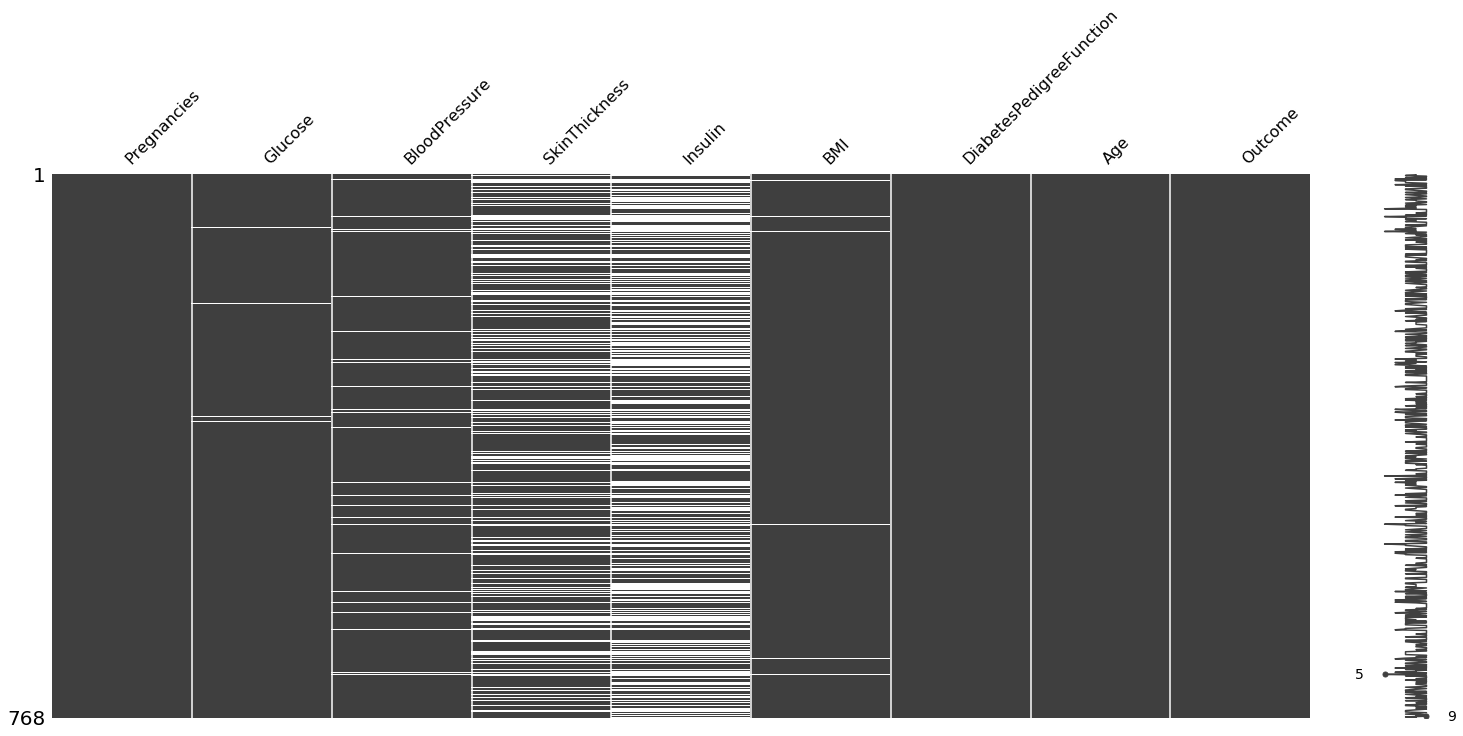

In [38]:
%matplotlib inline
msno.matrix(diabetes_pima)

### Hunch: what if the missingness is related to the categorical `Outcome` variable?

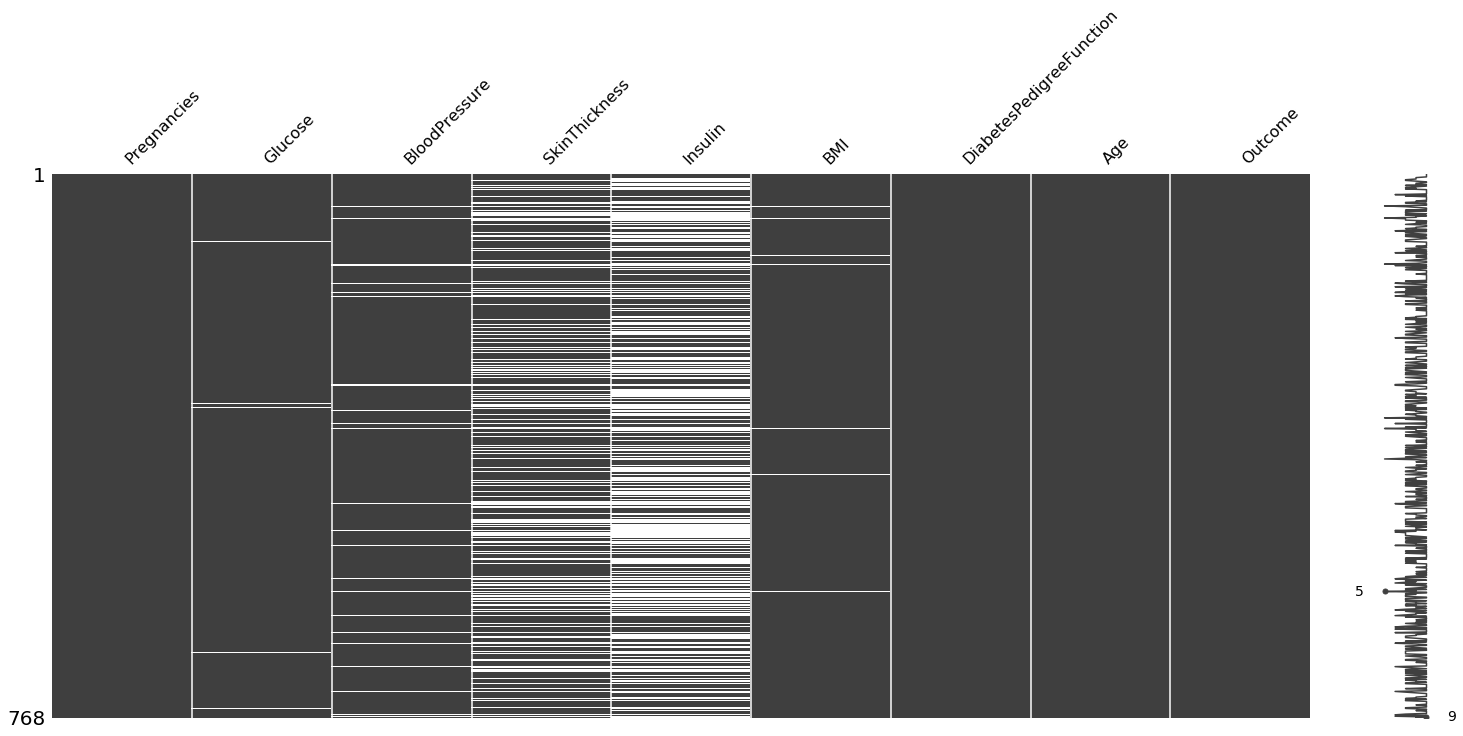

In [39]:
#reorder the dataframe by outcome
sorted_pima = diabetes_pima.sort_values( by=['Outcome'] )
# visualize a missingno matrix plot
msno.matrix(sorted_pima)
plt.show()

### `missingno` Bar Plot

gives an overview of the proportions of missingness in each feature

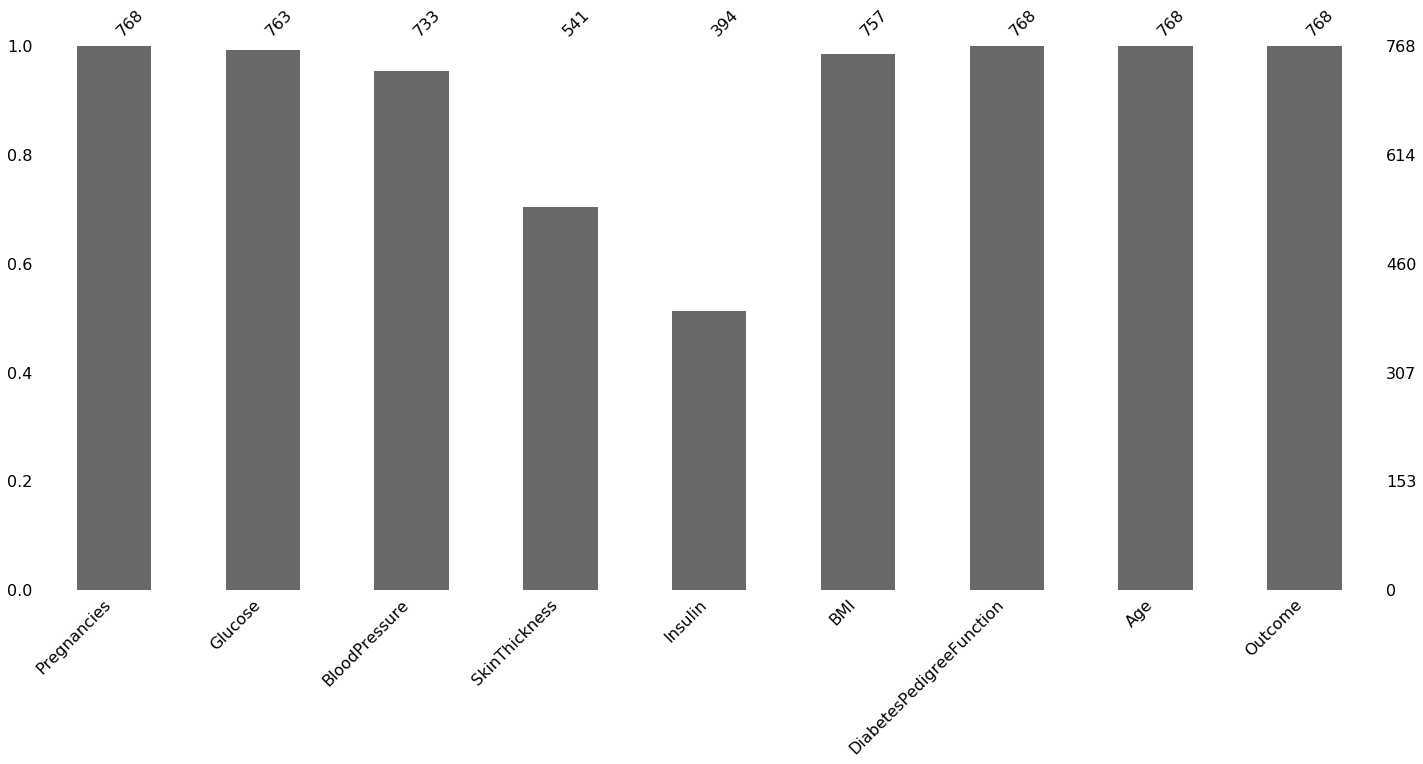

In [40]:
msno.bar(diabetes_pima)
plt.show()

### `missingno` Heatmap

This will identify correlated missingness (where a missing value in one column is predictive of a missing value in the other)

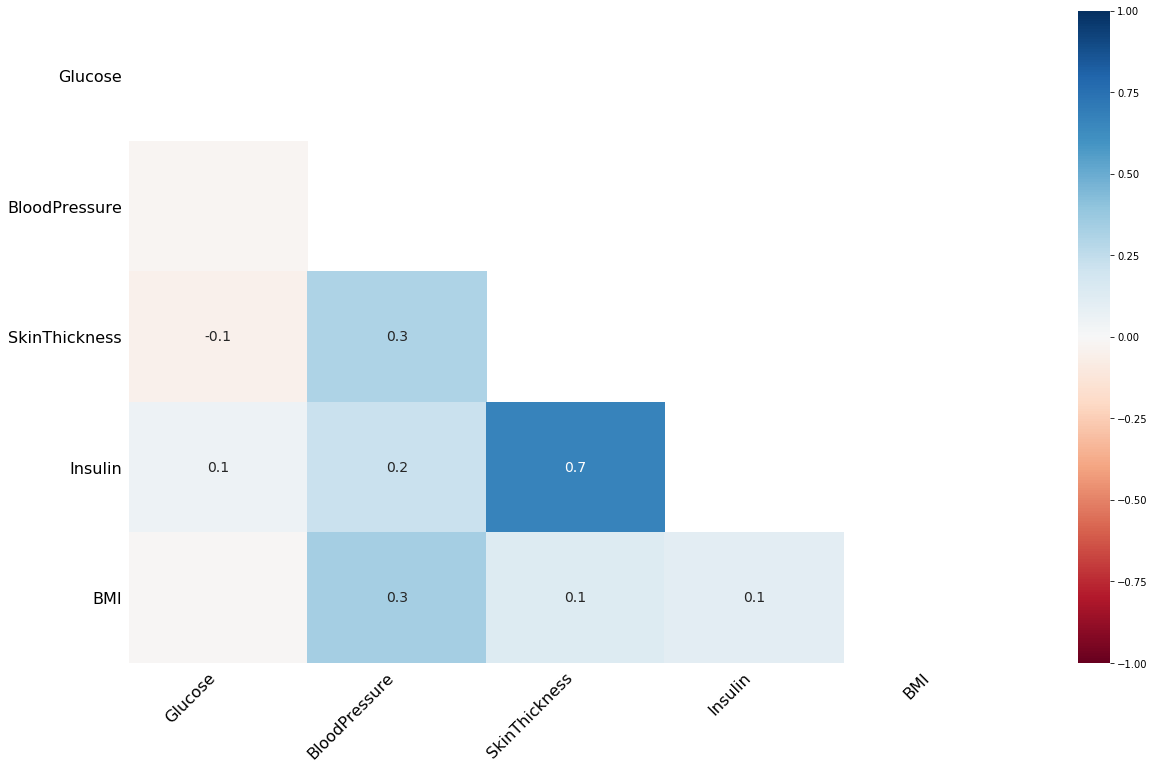

In [41]:
msno.heatmap(diabetes_pima)
plt.show()

### Interesting! Let's try our ordered matrix plot again....

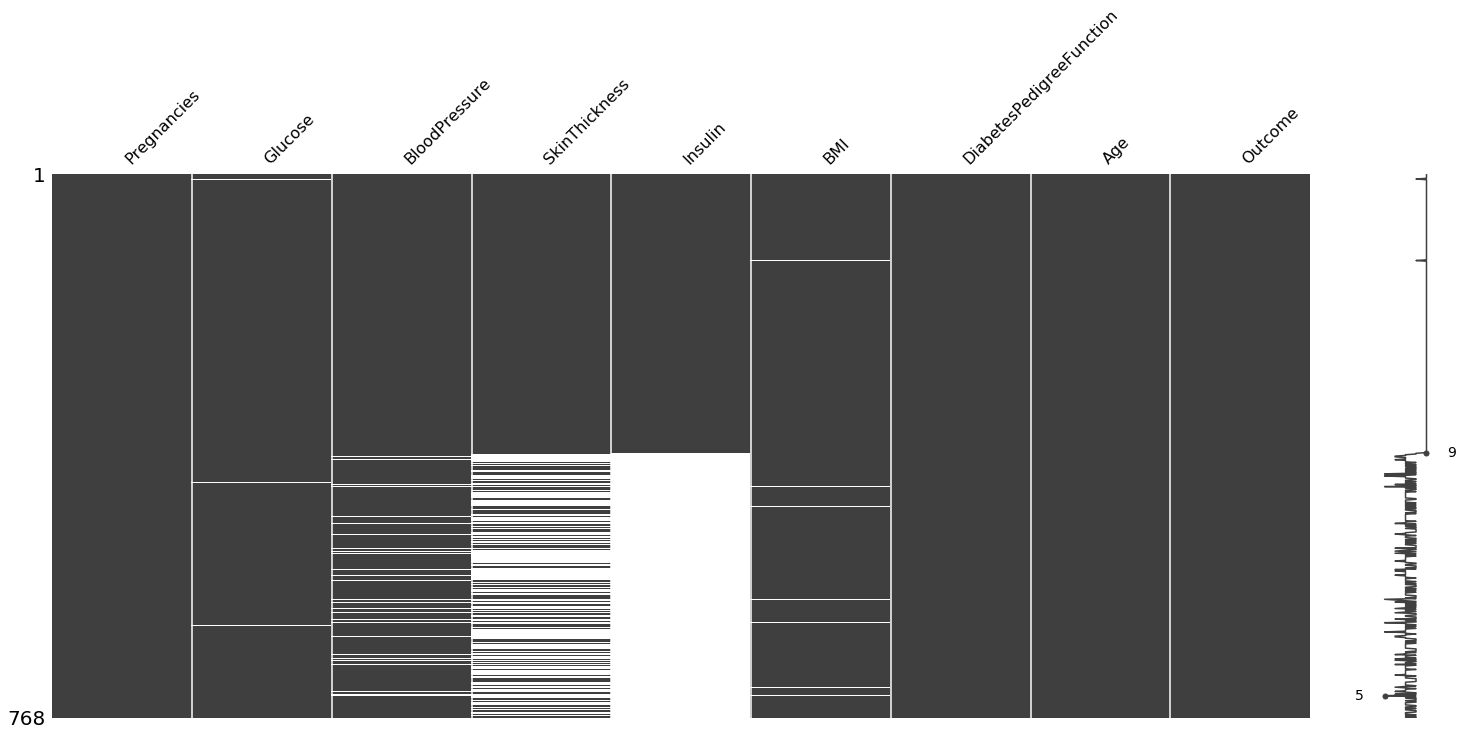

In [42]:
#reorder the dataframe by outcome
sorted_pima = diabetes_pima.sort_values( by=['Insulin'] )
# visualize a missingno matrix plot
msno.matrix(sorted_pima)
plt.show()

### `missingno` Dendrogram

hierarchical clustering of shared missingness

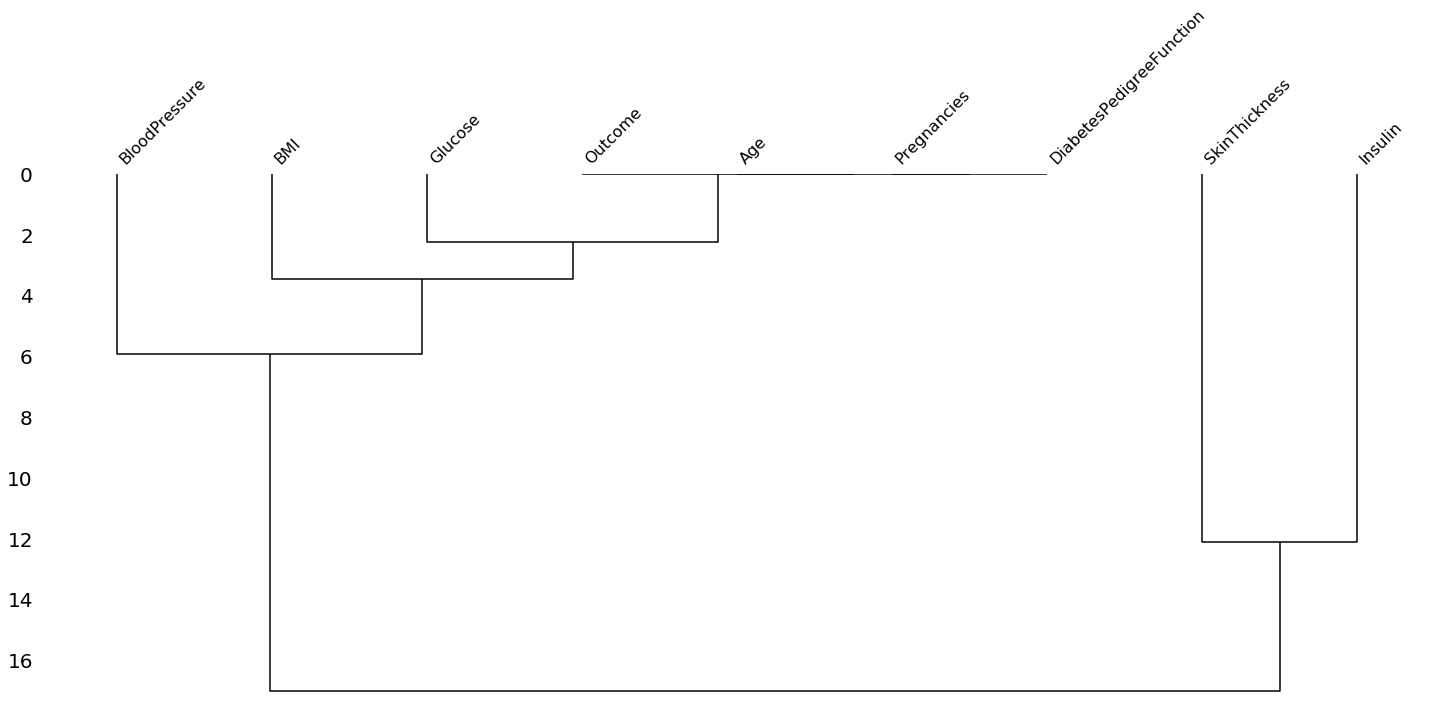

In [43]:
msno.dendrogram(diabetes_pima)
plt.show()

## We looked at some visualizations of our data's missingness. Next week we will focus on visualizing our data!
<img src="https://content.techgig.com/photo/80071467/pros-and-cons-of-python-programming-language-that-every-learner-must-know.jpg?132269" width="100%" style="margin-left:auto; margin-right:auto">